## BREAST CANCER PREDICTION

Breast Cancer can be benign or malignant.So its comes under classification problem.
Dataset taken here is Wisconsin dataset 1995 which consist of 30 columns and 522 rows. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import Data

In [3]:
data=pd.read_csv("data.csv")

In [4]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Drop Unused Columns

In [7]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [8]:
data
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
data.dropna()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
for i in data.columns:
    print(i," ",data[i].isnull().sum())

diagnosis   0
radius_mean   0
texture_mean   0
perimeter_mean   0
area_mean   0
smoothness_mean   0
compactness_mean   0
concavity_mean   0
concave points_mean   0
symmetry_mean   0
fractal_dimension_mean   0
radius_se   0
texture_se   0
perimeter_se   0
area_se   0
smoothness_se   0
compactness_se   0
concavity_se   0
concave points_se   0
symmetry_se   0
fractal_dimension_se   0
radius_worst   0
texture_worst   0
perimeter_worst   0
area_worst   0
smoothness_worst   0
compactness_worst   0
concavity_worst   0
concave points_worst   0
symmetry_worst   0
fractal_dimension_worst   0


In [11]:
data["diagnosis"]=data["diagnosis"].map({'M':1,'B':0})

In [12]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[1.29767572 1.09706398 2.07333501 ... 2.29607613 2.75062224 1.93701461]
 [1.29767572 1.82982061 0.35363241 ... 1.0870843  0.24388967 0.28118999]
 [1.29767572 1.57988811 0.45618695 ... 1.95500035 1.152255   0.20139121]
 ...
 [1.29767572 0.70228425 2.0455738  ... 0.41406869 1.10454895 0.31840916]
 [1.29767572 1.83834103 2.33645719 ... 2.28998549 1.91908301 2.21963528]
 [0.77060855 1.80840125 1.22179204 ... 1.74506282 0.04813821 0.75120669]]


In [14]:
z.shape

(569, 31)

In [15]:
threshold = 3
print(np.where(z > 3))

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
        12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
        42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
        78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
       108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       138, 138, 146, 146, 146, 151, 151, 152, 152, 152, 152, 152, 152,
       176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181, 190, 190,
       190, 190, 190, 192, 202, 203, 212, 212, 212, 212, 212, 212, 212,
       213, 213, 213, 213, 213, 219, 219, 232, 236, 236, 239, 239, 258,
       258, 258, 259, 259, 265, 265, 265, 265, 265, 288, 288, 290, 290,
       314, 314, 318, 323, 339, 339, 345, 351, 352, 352, 352, 352, 352,
       352, 352, 352, 368, 368, 370, 376, 376, 376, 379, 379, 379, 388,
       389, 400, 416, 417, 417, 430, 461, 461, 461, 461, 461, 4

In [16]:
data2=pd.read_csv("data.csv")

In [17]:
data2 = data2[(z < 3).all(axis=1)]

In [18]:
data2.shape

(495, 33)

In [19]:
data3 = data

In [20]:
Q1 = data3.quantile(0.25)
Q3 = data3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

diagnosis                    1.000000
radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_

In [21]:
out = data3[~((data3 < (Q1 - 1.5 * IQR)) |(data3 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
out.shape

(398, 31)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data["Intercept"] = 1
vif = pd.DataFrame()
vif["variables"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# View results using print
print(vif)

                  variables          VIF
0                 diagnosis     4.431144
1               radius_mean  3817.259795
2              texture_mean    11.891280
3            perimeter_mean  3792.697001
4                 area_mean   348.115385
5           smoothness_mean     8.194309
6          compactness_mean    51.445960
7            concavity_mean    71.002747
8       concave points_mean    60.172431
9             symmetry_mean     4.220806
10   fractal_dimension_mean    15.756978
11                radius_se    75.737325
12               texture_se     4.205686
13             perimeter_se    70.398925
14                  area_se    41.196467
15            smoothness_se     4.070801
16           compactness_se    15.366350
17             concavity_se    15.914022
18        concave points_se    11.601253
19              symmetry_se     5.179151
20     fractal_dimension_se     9.724753
21             radius_worst   815.945630
22            texture_worst    18.606605
23          peri

In [72]:
X=data.drop(['diagnosis'],axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Intercept
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [73]:
Y=data["diagnosis"]

In [74]:
minmax=MinMaxScaler()

In [75]:
X=minmax.fit_transform(X)

In [76]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.59846245, 0.41886396,
        0.        ],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.23358959, 0.22287813,
        0.        ],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.40370589, 0.21343303,
        0.        ],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.12872068, 0.1519087 ,
        0.        ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.49714173, 0.45231536,
        0.        ],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.25744136, 0.10068215,
        0.        ]])

In [77]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Intercept'],
      dtype='object')

In [78]:
X=pd.DataFrame(X,columns=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

ValueError: Shape of passed values is (569, 31), indices imply (569, 30)

In [24]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.59846245, 0.41886396,
        0.        ],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.23358959, 0.22287813,
        0.        ],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.40370589, 0.21343303,
        0.        ],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.12872068, 0.1519087 ,
        0.        ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.49714173, 0.45231536,
        0.        ],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.25744136, 0.10068215,
        0.        ]])

In [25]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Intercept
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


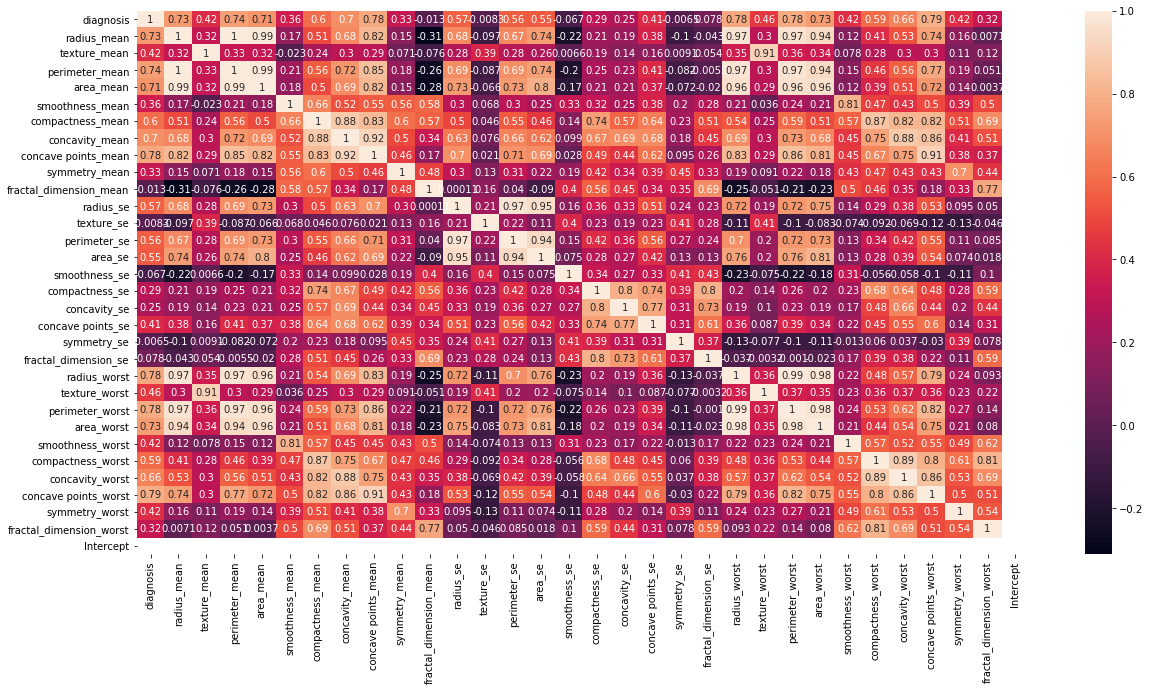

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

# Feature Selection

In [27]:
data_afs=data.drop(['fractal_dimension_mean','perimeter_mean','radius_worst','perimeter_worst','compactness_mean','compactness_worst','concave points_worst','concavity_mean','concave points_mean','area_mean','fractal_dimension_se','texture_mean','texture_se','smoothness_se','symmetry_se'],axis=1)

In [28]:
data_afs.head()

,diagnosis,radius_mean,smoothness_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Intercept
0,1,17.99,0.11840,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,17.33,2019.0,0.1622,0.7119,0.4601,0.11890,1
1,1,20.57,0.08474,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,23.41,1956.0,0.1238,0.2416,0.2750,0.08902,1
2,1,19.69,0.10960,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,25.53,1709.0,0.1444,0.4504,0.3613,0.08758,1
3,1,11.42,0.14250,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,26.50,567.7,0.2098,0.6869,0.6638,0.17300,1
4,1,20.29,0.10030,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,16.67,1575.0,0.1374,0.4000,0.2364,0.07678,1


In [29]:
data_afs.corr()

,diagnosis,radius_mean,smoothness_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Intercept
diagnosis,1.000000,0.730029,0.358560,0.330499,0.567134,0.556141,0.548236,0.292999,0.253730,0.408042,0.456903,0.733825,0.421465,0.659610,0.416294,0.323872,NaN
radius_mean,0.730029,1.000000,0.170581,0.147741,0.679090,0.674172,0.735864,0.206000,0.194204,0.376169,0.297008,0.941082,0.119616,0.526911,0.163953,0.007066,NaN
smoothness_mean,0.358560,0.170581,1.000000,0.557775,0.301467,0.296092,0.246552,0.318943,0.248396,0.380676,0.036072,0.206718,0.805324,0.434926,0.394309,0.499316,NaN
symmetry_mean,0.330499,0.147741,0.557775,1.000000,0.303379,0.313893,0.223970,0.421659,0.342627,0.393298,0.090651,0.177193,0.426675,0.433721,0.699826,0.438413,NaN
radius_se,0.567134,0.679090,0.301467,0.303379,1.000000,0.972794,0.951830,0.356065,0.332358,0.513346,0.194799,0.751548,0.141919,0.380585,0.094543,0.049559,NaN
perimeter_se,0.556141,0.674172,0.296092,0.313893,0.972794,1.000000,0.937655,0.416322,0.362482,0.556264,0.200371,0.730713,0.130054,0.418899,0.109930,0.085433,NaN
area_se,0.548236,0.735864,0.246552,0.223970,0.951830,0.937655,1.000000,0.284840,0.270895,0.415730,0.196497,0.811408,0.125389,0.385100,0.074126,0.017539,NaN
compactness_se,0.292999,0.206000,0.318943,0.421659,0.356065,0.416322,0.284840,1.000000,0.801268,0.744083,0.143003,0.199371,0.227394,0.639147,0.277878,0.590973,NaN
concavity_se,0.253730,0.194204,0.248396,0.342627,0.332358,0.362482,0.270895,0.801268,1.000000,0.771804,0.100241,0.188353,0.168481,0.662564,0.197788,0.439329,NaN
concave points_se,0.408042,0.376169,0.380676,0.393298,0.513346,0.556264,0.415730,0.744083,0.771804,1.000000,0.086741,0.342271,0.215351,0.549592,0.143116,0.310655,NaN


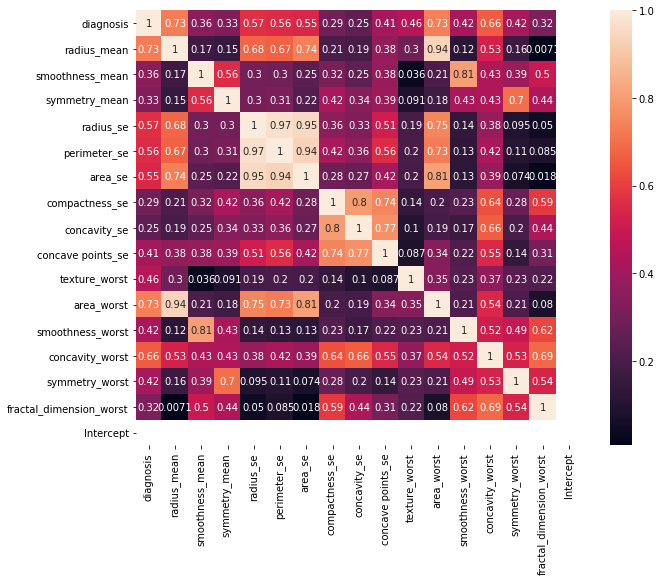

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data_afs.corr(),annot=True)

In [79]:
Xn = data_afs.drop(['diagnosis'],axis=1)
Xn

,radius_mean,smoothness_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,Intercept
0,17.99,0.11840,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,17.33,2019.0,0.16220,0.7119,0.4601,0.11890,1
1,20.57,0.08474,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,23.41,1956.0,0.12380,0.2416,0.2750,0.08902,1
2,19.69,0.10960,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,25.53,1709.0,0.14440,0.4504,0.3613,0.08758,1
3,11.42,0.14250,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,26.50,567.7,0.20980,0.6869,0.6638,0.17300,1
4,20.29,0.10030,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,16.67,1575.0,0.13740,0.4000,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,0.11100,0.1726,1.1760,7.673,158.70,0.02891,0.05198,0.02454,26.40,2027.0,0.14100,0.4107,0.2060,0.07115,1
565,20.13,0.09780,0.1752,0.7655,5.203,99.04,0.02423,0.03950,0.01678,38.25,1731.0,0.11660,0.3215,0.2572,0.06637,1
566,16.60,0.08455,0.1590,0.4564,3.425,48.55,0.03731,0.04730,0.01557,34.12,1124.0,0.11390,0.3403,0.2218,0.07820,1
567,20.60,0.11780,0.2397,0.7260,5.772,86.22,0.06158,0.07117,0.01664,39.42,1821.0,0.16500,0.9387,0.4087,0.12400,1


In [33]:
Xn.columns

Index(['radius_mean', 'smoothness_mean', 'symmetry_mean', 'radius_se',
       'perimeter_se', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'texture_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Intercept'],
      dtype='object')

In [189]:
Y=data_afs['diagnosis']
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [80]:
vif = pd.DataFrame()
vif["variables"] = Xn.drop(["area_worst","radius_se","perimeter_se"],axis=1).columns
vif["VIF"] = [variance_inflation_factor(Xn.drop(['area_worst',"radius_se","perimeter_se"],axis=1).values, i) for i in range(Xn.drop(['area_worst',"radius_se","perimeter_se"],axis=1).shape[1])]

# View results using print
print(vif)

                  variables         VIF
0               radius_mean    4.543578
1           smoothness_mean    4.473531
2             symmetry_mean    3.122381
3                   area_se    2.585111
4            compactness_se    4.593340
5              concavity_se    5.524735
6         concave points_se    4.011654
7             texture_worst    1.320568
8          smoothness_worst    4.872689
9           concavity_worst    7.930120
10           symmetry_worst    3.150370
11  fractal_dimension_worst    4.333984
12                Intercept  224.675180


In [81]:
Xn=Xn.drop(["area_worst","radius_se","perimeter_se"],axis=1)

# PCA Implementation

In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(Xn)

In [191]:
pca_df = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2'])

In [192]:
pca_df

,PC1,PC2
0,1143.327483,39.536705
1,1075.343027,-35.876430
2,830.168830,-0.040740
3,-313.077126,7.193381
4,696.453716,9.379730
...,...,...
564,1151.706132,43.917118
565,852.498230,3.105960
566,243.477838,-7.848795
567,941.483936,-15.506283


In [193]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.99773011 0.0021646 ]


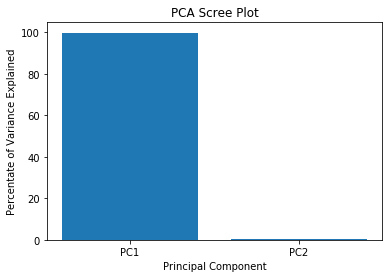

In [194]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']
plt.bar(x= [1,2], height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

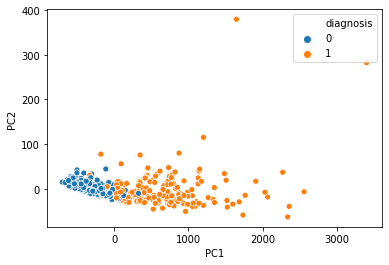

In [195]:
sns.scatterplot(pca_df.iloc[:,0],pca_df.iloc[:,1],hue=Y)

# Split Data Into Train and Test

In [82]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xn,Y,test_size=0.3)

In [83]:
Xtrain.shape , Ytrain.shape ,Xtest.shape

((398, 13), (398,), (171, 13))

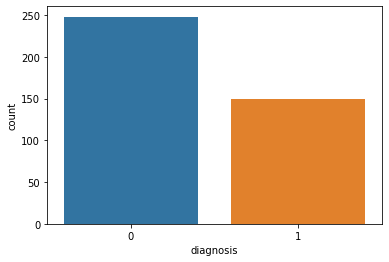

In [84]:
sns.countplot(Ytrain)

# SMOTE Implementation

In [85]:
from imblearn.over_sampling import SMOTE 

In [86]:
sm = SMOTE(random_state = 2) 

In [87]:
X_train, Y_train = sm.fit_sample(Xtrain, Ytrain.ravel()) 

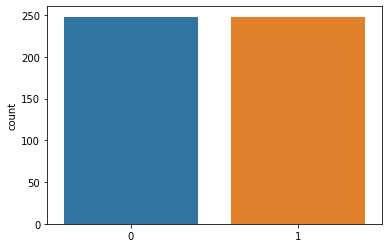

In [88]:
sns.countplot(Y_train)

# PCA Test Train Split and SMOTE implementation

In [203]:
Xtrainpca,Xtestpca,Ytrainpca,Ytestpca=train_test_split(pca_df,Y,test_size=0.30)

In [204]:
Xtrainpca.shape, Ytrainpca.shape, Xtestpca.shape ,Ytestpca.shape

((398, 2), (398,), (171, 2), (171,))

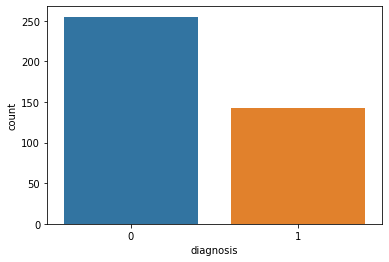

In [205]:
sns.countplot(Ytrainpca)

In [206]:
smote=SMOTE()

In [207]:
X_trainpca, Y_trainpca = sm.fit_sample(Xtrainpca, Ytrainpca.ravel()) 

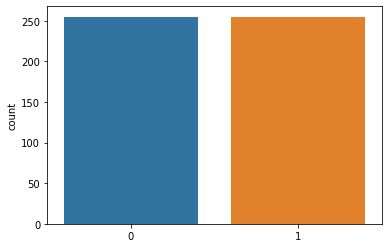

In [208]:
sns.countplot(Y_trainpca)

# SVM 

In [89]:
from sklearn.svm import SVC

In [90]:
svm=SVC()

In [91]:
svm.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
svm_p=svm.predict(Xtest)

In [93]:
svm_p

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [94]:
print(classification_report(Ytest,svm_p))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       109
           1       0.95      0.85      0.90        62

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



In [95]:
svm_accuracy=accuracy_score(Ytest,svm_p)
svm_accuracy

0.9298245614035088

In [96]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001],'kernel':['rbf','linear']} 

In [97]:
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_svm.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.600, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.495, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.495, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.495, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.495, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.910, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.909, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.929, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.939, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.929, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.919, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.940, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.919, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.990, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.970, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.900, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.879, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.939, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.929, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.929, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.960, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.939, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] .... C=100, gamma=0.01, kernel=linear, score=0.980, total=   0.7s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=0.980, total=   0.8s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.880, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.899, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.939, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.939, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.939, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.970, total=   3.5s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.990, total=   3.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.960, total=   4.5s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.980, total=   2.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.910, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.909, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.949, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [98]:
#C=100, gamma=0.0001, kernel=linear, score=0.990
grid_svm.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [99]:
grid_predictions = grid_svm.predict(Xtest)

In [59]:
print(classification_report(Ytest,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [60]:
svm_hptaccuracy=accuracy_score(Ytest,grid_predictions)

In [61]:
svm_hptaccuracy

0.9532163742690059

# SVM with PCA

In [55]:
svm_pca=SVC()

In [56]:
svm_pca.fit(X_trainpca,Y_trainpca)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
svmpca_p=svm_pca.predict(Xtestpca)

In [58]:
print(classification_report(Ytestpca,svmpca_p))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       111
           1       0.93      0.87      0.90        60

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [59]:
svmpca_acc=accuracy_score(Ytestpca,svmpca_p)

In [67]:
svmpca_acc

0.9239766081871345

In [68]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_trainpca,Y_trainpca)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.520, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.530, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.520, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.495, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.495, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.850, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.930, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.930, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.899, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.909, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.850, total=   0.9s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.930, total=   2.5s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.930, total=   3.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.899, total=   1.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.909, total=   1.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.850, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.910, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.850, total=  10.2s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.930, total=  17.9s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.930, total=  15.2s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.899, total=  10.5s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.909, total=  10.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.850, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.930, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ... C=100, gamma=0.001, kernel=linear, score=0.860, total=  42.5s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.930, total= 1.5min
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.910, total=  47.3s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.889, total=  32.9s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.869, total= 1.6min
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.870, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.900, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.850, total=  52.5s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.930, total=  31.6s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.910, total= 1.2min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.869, total=  25.9s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.879, total= 1.7min


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 71.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [69]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [70]:
grid_predictions = grid.predict(Xtestpca)

In [71]:
print(classification_report(Ytestpca,grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       108
           1       0.87      0.86      0.86        63

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [72]:
svmpcaht_acc=accuracy_score(Ytestpca,grid_predictions)

# Logistic Regression

In [217]:
logreg=LogisticRegression()

In [218]:
logreg.fit(Xtrain,Ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
lr_p=logreg.predict(Xtest)

In [220]:
print(classification_report(Ytest,lr_p))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [221]:
lr_acc=accuracy_score(Ytest,lr_p)
lr_acc

0.9473684210526315

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
logreg_params={'C': [0.01, 0.1, 1],'penalty': ['l2'],'solver': ['liblinear', 'lbfgs']}
logreg_p2={'C': [0.01, 0.1, 1],'penalty': ['l1'],'solver': ['liblinear']}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=2200), param_grid = logreg_params)

In [224]:
grid_logre2=GridSearchCV(LogisticRegression(max_iter=2222),logreg_p2)

In [225]:
grid_logre2.fit(Xtrain,Ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=2222, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [226]:
pred=grid_logre2.predict(Xtest)

In [227]:
grid_logre2.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [228]:
print(classification_report(Ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [229]:
grid_logrp2_acc=accuracy_score(Ytest,pred)
grid_logrp2_acc

0.9473684210526315

In [230]:
grid_logreg.fit(Xtrain,Ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=2200, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [231]:
glr_p=grid_logreg.predict(Xtest)

In [232]:
grid_logreg.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [233]:
print(classification_report(Ytest,glr_p))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.92      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Logistic Regression With PCA

In [234]:
logpca=LogisticRegression()

In [235]:
logpca.fit(X_trainpca,Y_trainpca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
logpca_p=logpca.predict(Xtestpca)

In [237]:
print(classification_report(Ytestpca,logpca_p))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       102
           1       0.84      0.90      0.87        69

    accuracy                           0.89       171
   macro avg       0.88      0.89      0.89       171
weighted avg       0.89      0.89      0.89       171



In [238]:
logreg_pca=accuracy_score(Ytestpca,logpca_p)

In [239]:
logreg_pca

0.8888888888888888

# NAIVE BAYES

In [240]:
nb=MultinomialNB()

In [241]:
nb.fit(Xtrain,Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [242]:
nb_p=nb.predict(Xtest)

In [243]:
print(classification_report(Ytest,nb_p))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       109
           1       0.83      0.81      0.82        62

    accuracy                           0.87       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.87      0.87      0.87       171



In [244]:
nb_accuracy=accuracy_score(Ytest,nb_p)
nb_accuracy

0.8713450292397661

# Decision Tree Classifier

In [245]:
dt=DecisionTreeClassifier()

In [246]:
dt.fit(Xtrain,Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [247]:
dt_p=dt.predict(Xtest)

In [248]:
print(classification_report(Ytest,dt_p))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.92      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [249]:
dt_accuracy=accuracy_score(Ytest,dt_p)
dt_accuracy

0.9415204678362573

In [250]:

dt_params={'criterion':['gini','entropy'],'max_depth':[4,6,8,12]}


In [251]:
grid_dt=GridSearchCV(DecisionTreeClassifier(),dt_params)

In [252]:
grid_dt.fit(Xtrain,Ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [253]:
pdt=grid_dt.predict(Xtest)

In [254]:
print(classification_report(Ytest,pdt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       109
           1       0.89      0.92      0.90        62

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



In [255]:
dtht_accuracy=accuracy_score(Ytest,pdt)
dtht_accuracy

0.9298245614035088

# Decision Tree With PCA

In [256]:
dt_pca=DecisionTreeClassifier()

In [257]:
dt_pca.fit(X_trainpca,Y_trainpca)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [258]:
dt_pca_p=dt_pca.predict(Xtestpca)

In [259]:
print(classification_report(Ytestpca,dt_pca_p))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       102
           1       0.79      0.84      0.82        69

    accuracy                           0.85       171
   macro avg       0.84      0.85      0.84       171
weighted avg       0.85      0.85      0.85       171



In [260]:
dtpca_acc=accuracy_score(Ytestpca,dt_pca_p)
dtpca_acc

0.847953216374269

# Random Forest Classifier

In [261]:
rfc=RandomForestClassifier()

In [262]:
rfc.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [263]:
rfc_p=rfc.predict(Xtest)

In [264]:
print(classification_report(Ytest,rfc_p))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.95      0.95      0.95        62

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [265]:
rfc_acc=accuracy_score(Ytest,rfc_p)
rfc_acc

0.9649122807017544

In [266]:
param_rfc={'criterion':['entropy','gini'],'max_depth':[4,6,8,12]}

In [267]:
gs_rfc=GridSearchCV(RandomForestClassifier(),param_rfc)

In [268]:
gs_rfc.fit(Xtrain,Ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [269]:
p_rfc=gs_rfc.predict(Xtest)

In [270]:
print(classification_report(Ytest,p_rfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.97      0.94      0.95        62

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [271]:
rfc_hptacc=accuracy_score(Ytest,p_rfc)
rfc_hptacc

0.9649122807017544

# Random Forest Classifier with PCA

In [272]:
rfc_pca=RandomForestClassifier()

In [273]:
rfc_pca.fit(X_trainpca,Y_trainpca)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [274]:
rf_pca_p=rfc_pca.predict(Xtestpca)

print(classification_report(Ytestpca,rf_pca_p))

In [275]:
rfcpca_acc=accuracy_score(Ytestpca,rf_pca_p)
rfcpca_acc

0.8713450292397661

# AdaBoost Classifier

In [276]:
ada = AdaBoostClassifier(n_estimators=30, random_state=7)

In [277]:
ada.fit(Xtrain,Ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=7)

In [278]:
ada_p=ada.predict(Xtest)

In [279]:
print(classification_report(Ytest,ada_p))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       109
           1       0.91      0.97      0.94        62

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



In [280]:
ada_acc=accuracy_score(Ytest,ada_p)
ada_acc

0.9532163742690059

In [281]:
adapca=AdaBoostClassifier(n_estimators=30,random_state=7)

In [282]:
adapca.fit(X_trainpca,Y_trainpca)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=7)

In [283]:
adapca_p=adapca.predict(Xtestpca)

In [284]:
print(classification_report(Ytestpca,adapca_p))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       102
           1       0.82      0.81      0.82        69

    accuracy                           0.85       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.85      0.85      0.85       171



In [285]:
adapca_acc=accuracy_score(Ytestpca,adapca_p)
adapca_acc

0.8538011695906432

# XG Boost Classifier

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

In [287]:
XGB=GradientBoostingClassifier(max_depth=5, n_estimators=500, learning_rate=0.01)

In [288]:
XGB.fit(Xtrain,Ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [289]:
xgb_p=XGB.predict(Xtest)

In [290]:
print(classification_report(Ytest,xgb_p))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       109
           1       0.94      0.94      0.94        62

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [291]:
xgb_acc=accuracy_score(Ytest,xgb_p)

In [292]:
xgb_acc

0.9532163742690059

# Comparision Between Models

In [514]:
dictio={
    #"SVM":svm_hptaccuracy,
    "SVM with PCA":svmpca_acc,
    "Logistic Regression":lr_acc,
    "Logistic Regression+PCA":logreg_pca,
    "Naive Bayes":nb_accuracy,
    "Decision Tree":dtht_accuracy,
    "Decision Tree+PCA":dtpca_acc,
    "Random Forest Classifier":rfc_hptacc,
    "Adaboost Classifier":ada_acc,
    "XG Boost Classifier":xgb_acc
}

In [515]:
accuracies=pd.DataFrame(dictio.items(), columns=['Model', 'Accuracy'])

In [516]:
accuracies

,Model,Accuracy
0,SVM with PCA,0.929825
1,Logistic Regression,0.947368
2,Logistic Regression+PCA,0.888889
3,Naive Bayes,0.871345
4,Decision Tree,0.929825
5,Decision Tree+PCA,0.847953
6,Random Forest Classifier,0.964912
7,Adaboost Classifier,0.953216
8,XG Boost Classifier,0.953216


In [517]:
accuracies.to_csv("Model_Accuracies.csv")

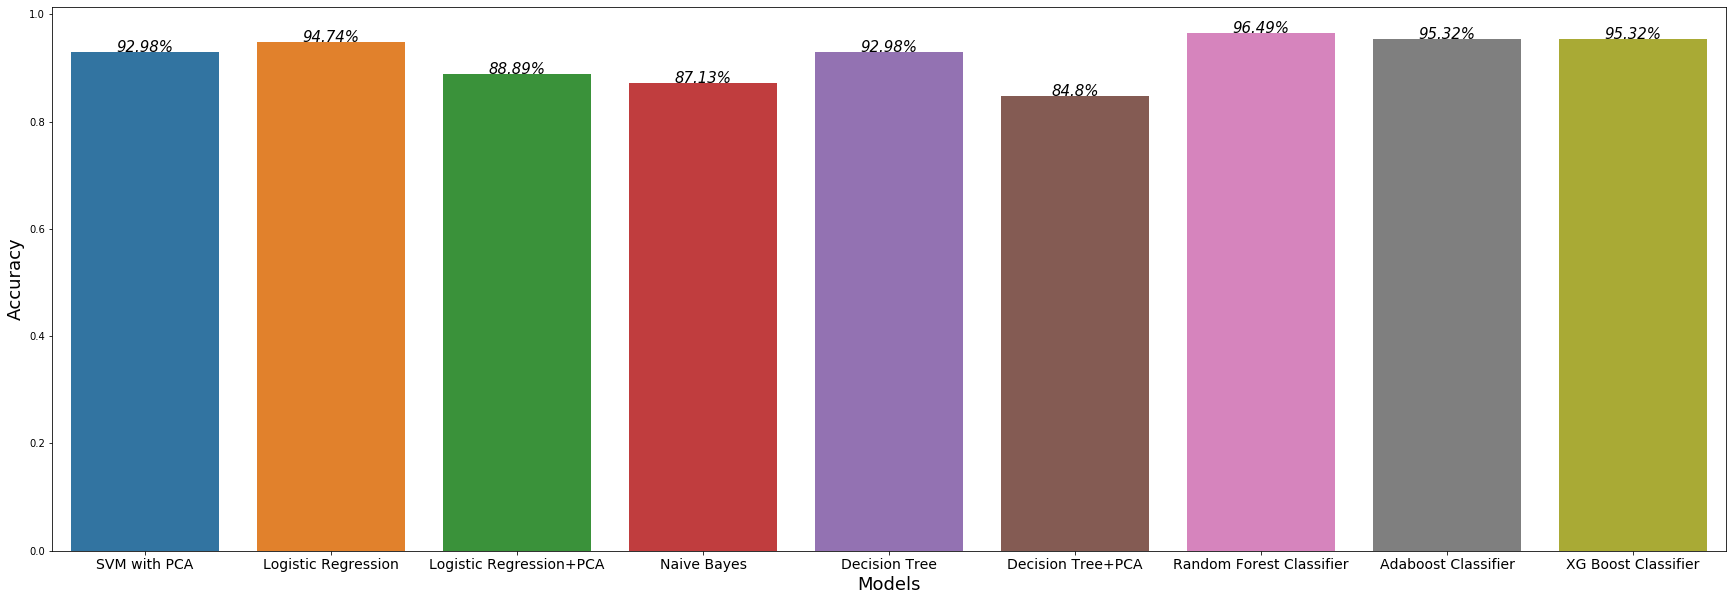

In [518]:
fig=plt.figure(figsize=(30,10))
g=sns.barplot("Model","Accuracy",data=accuracies)

for index,row in accuracies.iterrows():
    g.text(index,row.Accuracy,str(round(row.Accuracy*100,2))+'%',fontsize=15,style='italic', color='black', ha="center")
plt.xlabel("Models",fontsize=18)
plt.ylabel("Accuracy",fontsize=18)
plt.xticks(fontsize=14)
plt.show()
fig.savefig('Accuracies2.png')

In [497]:
from featureselection import FeatureSelector

# Pipelining

In [498]:
from sklearn.pipeline import Pipeline

In [499]:
feature_names=['radius_mean', 'smoothness_mean', 'symmetry_mean', 'radius_se',
       'perimeter_se', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'texture_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [100]:
pipe2 = Pipeline(steps=[('minmaxscaler',MinMaxScaler()),('model',gs_rfc)])

NameError: name 'Pipeline' is not defined

In [101]:
pipe2

NameError: name 'pipe2' is not defined

In [502]:
pipe2.fit(Xtrain,Ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Pipeline(memory=None,
         steps=[('fs', FeatureSelector(feature_names=None)),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 GridSearchCV(cv=None, error_score=nan,
                              estimator=RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min...
                                    

In [503]:
predictf=pipe2.predict(Xtest)


In [504]:
accuracy_score(Ytest,predictf)

0.9707602339181286

In [505]:
import pickle

In [506]:
pickle.dump(pipe2, open('model.pkl','wb'))


In [507]:
lm=pickle.load(open('model.pkl','rb'))
res=lm.score(Xtest,Ytest)
res

0.9707602339181286

In [508]:
datatesting=pd.read_csv("data.csv")

In [509]:
datatesting

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [510]:
datatesting=datatesting.drop(['id','diagnosis','Unnamed: 32'],axis=1)

In [511]:
d=np.array(datatesting.loc[1]).reshape(1,-1)
d=pd.DataFrame(d,columns=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [512]:
d

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902


In [513]:
lm.predict(d)

array([1], dtype=int64)